## Lasso Regression

Lasso Regression is almost identical to Ridge Regression, the only difference being that we take the absolute value as opposed to the squaring the weights when computing the ridge regression penalty.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
# Generate some synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Define a range of lambda (alpha) values to test
lambda_values = [0, 0.01, 0.1, 1, 10, 100]

In [19]:
# Train the Lasso Regression model with different lambda values
train_errors = []
test_errors = []

for alpha in lambda_values:
    if alpha == 0:
        # Set a small non-zero alpha for Lasso when alpha=0
        lasso_model = Lasso(alpha=0.0001, max_iter=10000)
        lasso_model.fit(X_train_scaled, y_train)
    else:
        # Use Lasso for other alpha values
        lasso_model = Lasso(alpha=alpha, max_iter=10000)
        lasso_model.fit(X_train_scaled, y_train)
    
    y_train_pred = lasso_model.predict(X_train_scaled)
    y_test_pred = lasso_model.predict(X_test_scaled)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

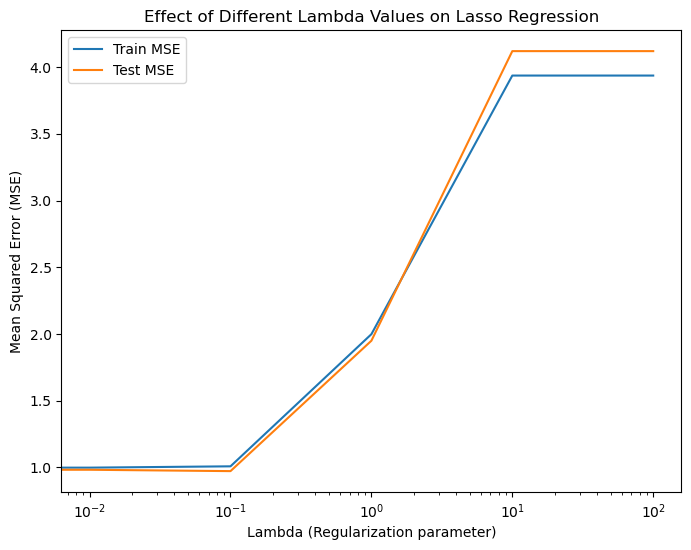

In [20]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(lambda_values, train_errors, label='Train MSE')
plt.plot(lambda_values, test_errors, label='Test MSE')
plt.xlabel('Lambda (Regularization parameter)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')
plt.legend()
plt.title('Effect of Different Lambda Values on Lasso Regression')
plt.show()

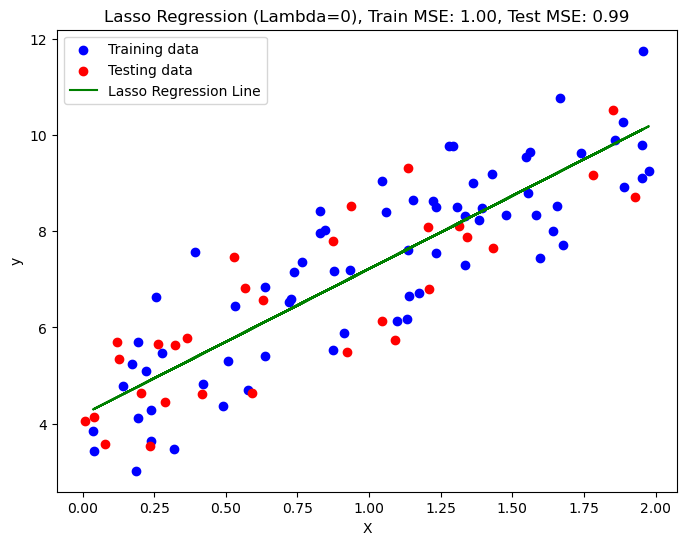

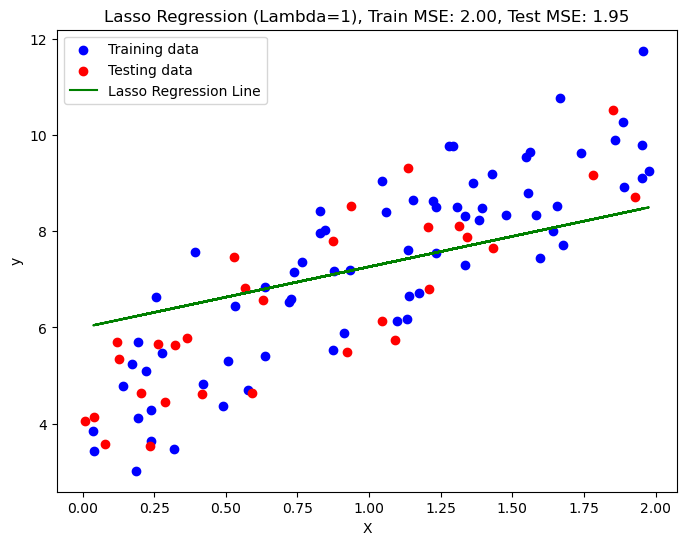

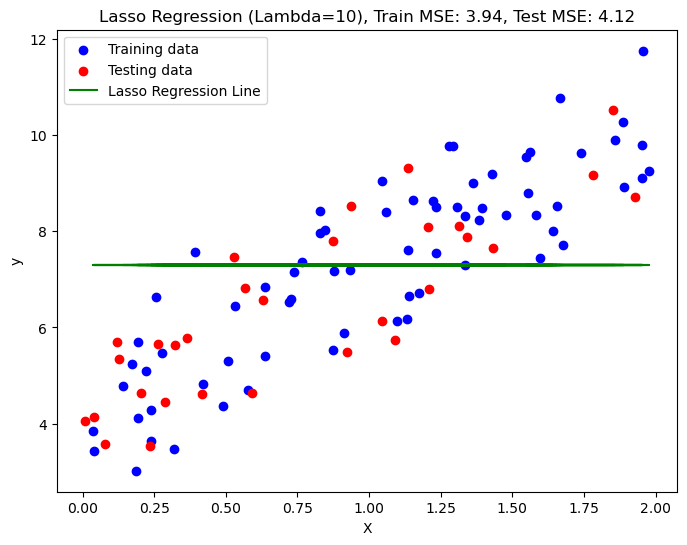

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def train_lasso_regression(X_train, y_train, X_test, y_test, alpha):
    if alpha == 0:
        # Use LinearRegression for alpha=0 (no regularization)
        linear_model = LinearRegression()
        linear_model.fit(X_train, y_train)
        
        y_train_pred = linear_model.predict(X_train)
        y_test_pred = linear_model.predict(X_test)
    else:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train the Lasso Regression model
        lasso_model = Lasso(alpha=alpha, max_iter=10000)
        lasso_model.fit(X_train_scaled, y_train)
    
        y_train_pred = lasso_model.predict(X_train_scaled)
        y_test_pred = lasso_model.predict(X_test_scaled)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Visualize the regression line and data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='red', label='Testing data')
    plt.plot(X_train, y_train_pred, color='green', label='Lasso Regression Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Lasso Regression (Lambda={alpha}), Train MSE: {train_error:.2f}, Test MSE: {test_error:.2f}')
    plt.show()

# Test with different lambda values
lambdas_to_test = [0, 1, 10]

for alpha in lambdas_to_test:
    train_lasso_regression(X_train, y_train, X_test, y_test, alpha)

#### Interpretation

&#8594; Lambda=0, Train MSE=1, Test MSE=0.99

- With lambda=0, there is no regularization, and the Lasso Regression essentially becomes a standard Linear Regression model without any penalty term.
- The training Mean Squared Error (MSE) is 1, which indicates that the model fits the training data quite well with little or no regularization.
- The testing MSE is 0.99, which suggests that the model generalizes well to unseen data, given that it performs almost as well on the testing set as it does on the training set.

&#8594; Lambda=1, Train MSE=2, Test MSE=1.95

- With lambda=1, there is moderate regularization applied to the model, shrinking some coefficients towards zero.
- The training MSE increases to 2, indicating that the model's fit to the training data is not as good as with lambda=0.
- The testing MSE is 1.95, which is also higher than the previous case, indicating that the model is less able to generalize to unseen data.

&#8594; Lambda=10, Train MSE=3.94, Test MSE=4.12

- With lambda=10, there is stronger regularization, leading to more coefficients being set close to zero.
- The training MSE further increases to 3.94, indicating that the model's fit to the training data is worse than the previous cases.
- The testing MSE also increases to 4.12, suggesting that the model's ability to generalize to unseen data is now reduced.